<a href="https://colab.research.google.com/github/Faliirham/PCVK25_3F_11/blob/main/Week5_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***D. PRAKTIKUM PERTEMUAN 3***

**Fali Irham Maulana / 2341720121**

**TI 3F**

---



# ***D-1 PERCOBAAN HISTOGRAM***

In [ ]:
#Load Library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

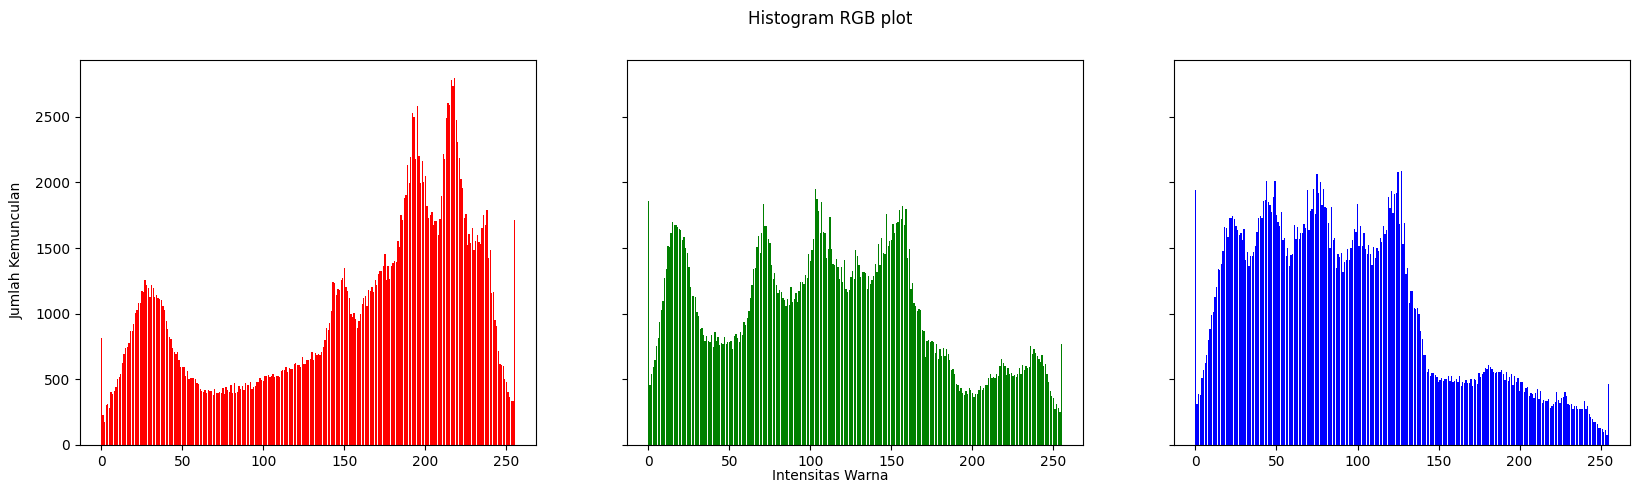

In [ ]:
#Membuat histogram citra

img = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height):
  for x in range(0,width):
    red[img[y,x,0]] += 1
    green[img[y,x,1]] += 1
    blue[img[y,x,2]] += 1

names = np.arange(256)
fig, axis = plt.subplots(1, 3, figsize=(20,5), sharex = True, sharey = True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axis[0].bar(names, red, color = 'red')
axis[1].bar(names, green, color = 'green')
axis[2].bar(names, blue, color = 'blue')




---


# ***PERTANYAAN PRAKTIKUM D1***

1. **Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?**


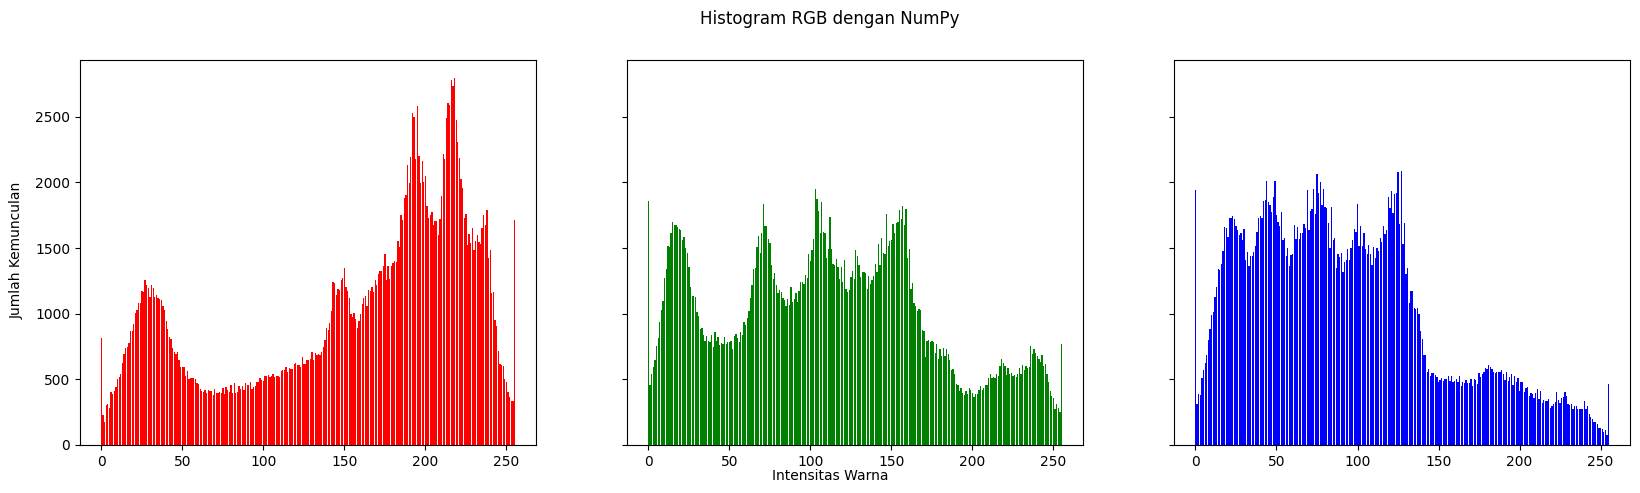

In [ ]:
#1 Membuat histogram dengan NumPy

# Histogram dengan numpy
red_hist, bins = np.histogram(img[:,:,0], bins=256, range=(0,256))
green_hist, _  = np.histogram(img[:,:,1], bins=256, range=(0,256))
blue_hist, _   = np.histogram(img[:,:,2], bins=256, range=(0,256))

# Plot hasil
fig, axis = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB dengan NumPy')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axis[0].bar(bins[:-1], red_hist, color='red')
axis[1].bar(bins[:-1], green_hist, color='green')
axis[2].bar(bins[:-1], blue_hist, color='blue')

plt.show()

**Hasilnya Menunjukkan output yang sama namun dengan versi yang lebih ringkas**

2. **Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.**

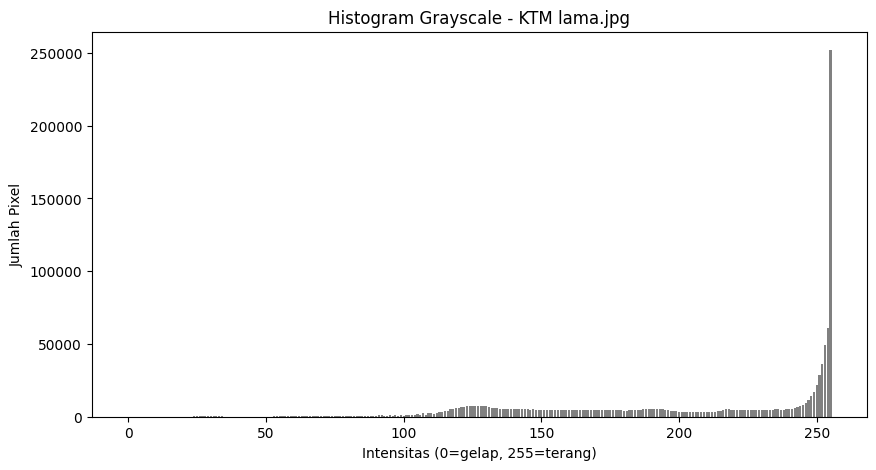

In [ ]:
ktm = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/KTM lama.jpg')

# Hitung histogram
hist, bins = np.histogram(ktm, bins=256, range=(0,256))

# Plot histogram
plt.figure(figsize=(10,5))
plt.title('Histogram Grayscale - KTM lama.jpg')
plt.xlabel('Intensitas (0=gelap, 255=terang)')
plt.ylabel('Jumlah Pixel')
plt.bar(bins[:-1], hist, color='gray')
plt.show()

**Dari hasil histogram diatas menunjukkan bahwa histogram pada ktm menunjukkan bahwa intensitas gambarnya adalah terang dimana ditunjukkan dengan penumpukan pada sebelah kanan**

# ***D-2 PERCOBAAN HISTOGRAM EQUALIZATION***

1. **Membuat histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart**

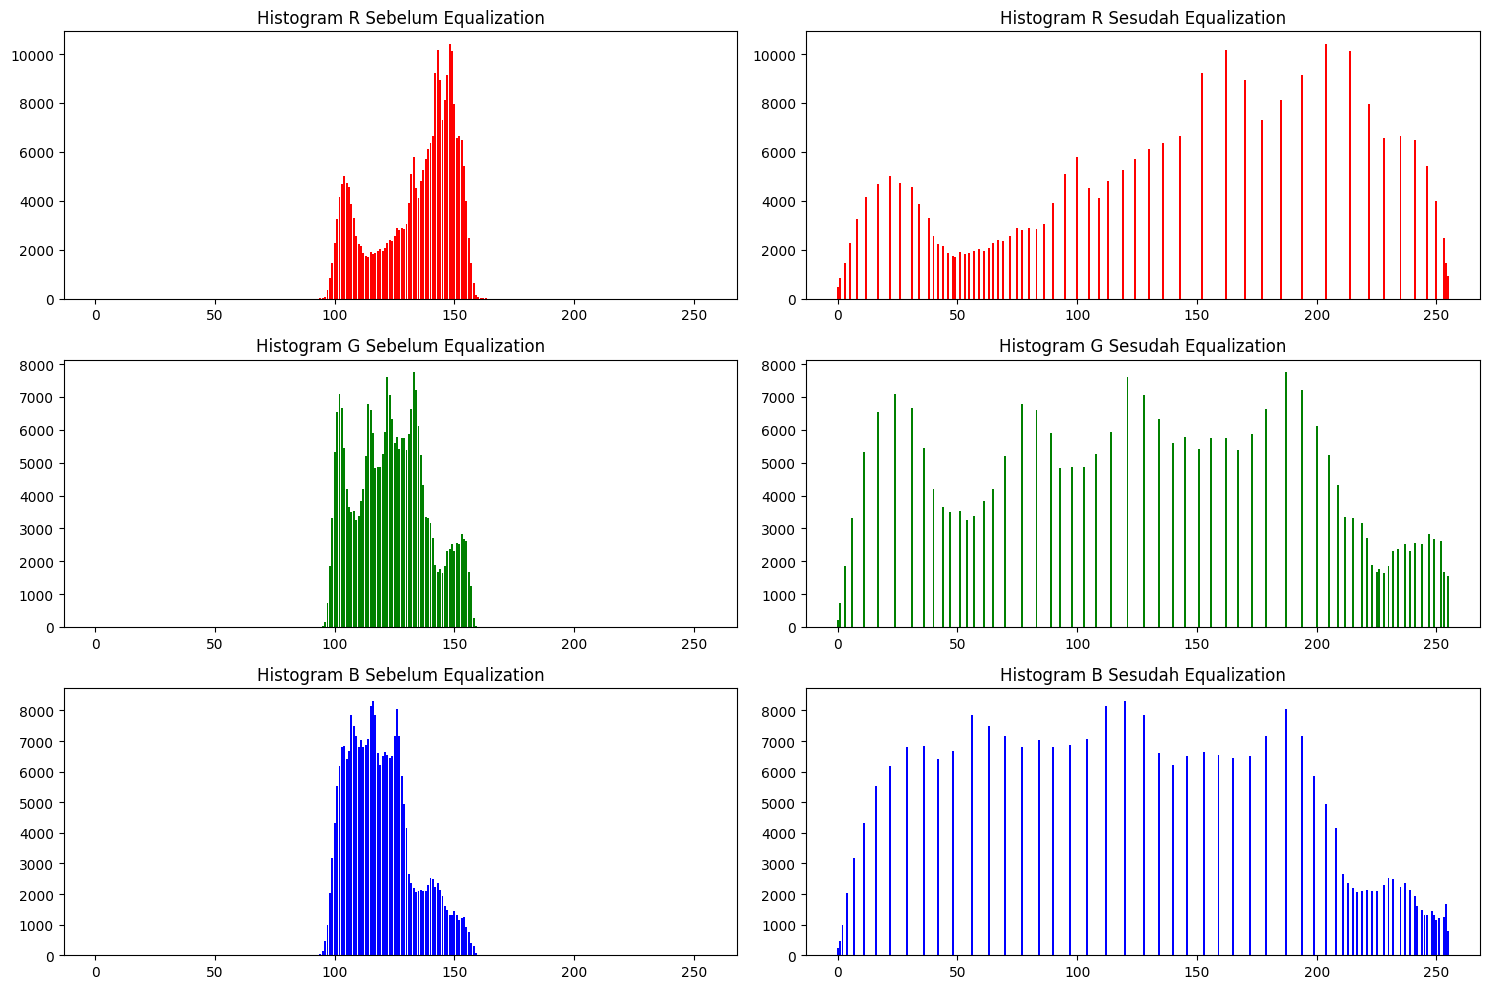

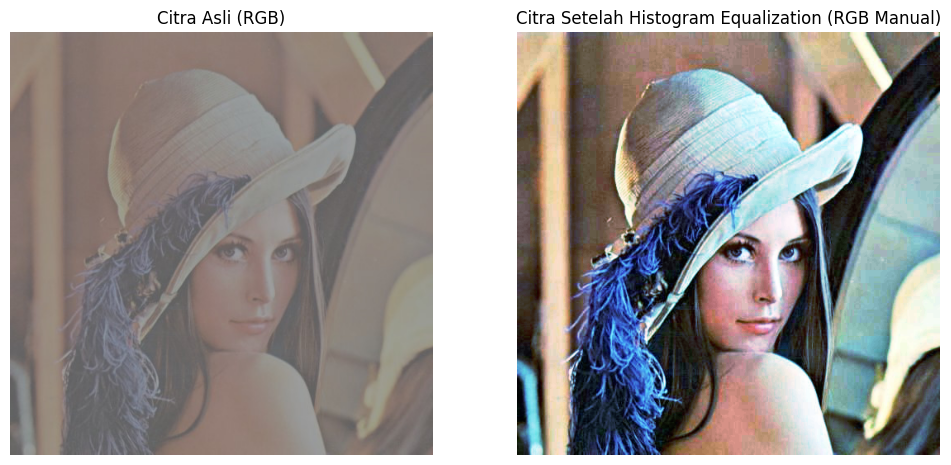

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Input image (RGB)
image = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/lena_lc.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Pisahkan channel R, G, B
r, g, b = cv.split(image)

# === PROSES CHANNEL R ===
hist_r = [0] * 256
h, w = r.shape
for y in range(h):
    for x in range(w):
        hist_r[r[y, x]] += 1

cdf_r = [0] * 256
cdf_r[0] = hist_r[0]
for i in range(1, 256):
    cdf_r[i] = cdf_r[i-1] + hist_r[i]

total_pixels = h * w
cdf_r_norm = [c/total_pixels for c in cdf_r]
map_r = [round(val*255) for val in cdf_r_norm]

r_eq = np.zeros_like(r)
for y in range(h):
    for x in range(w):
        r_eq[y, x] = map_r[r[y, x]]

hist_r_eq = [0]*256
for y in range(h):
    for x in range(w):
        hist_r_eq[r_eq[y,x]] += 1

# === PROSES CHANNEL G ===
hist_g = [0] * 256
h, w = g.shape
for y in range(h):
    for x in range(w):
        hist_g[g[y, x]] += 1

cdf_g = [0] * 256
cdf_g[0] = hist_g[0]
for i in range(1, 256):
    cdf_g[i] = cdf_g[i-1] + hist_g[i]

cdf_g_norm = [c/total_pixels for c in cdf_g]
map_g = [round(val*255) for val in cdf_g_norm]

g_eq = np.zeros_like(g)
for y in range(h):
    for x in range(w):
        g_eq[y, x] = map_g[g[y, x]]

hist_g_eq = [0]*256
for y in range(h):
    for x in range(w):
        hist_g_eq[g_eq[y,x]] += 1

# === PROSES CHANNEL B ===
hist_b = [0] * 256
h, w = b.shape
for y in range(h):
    for x in range(w):
        hist_b[b[y, x]] += 1

cdf_b = [0] * 256
cdf_b[0] = hist_b[0]
for i in range(1, 256):
    cdf_b[i] = cdf_b[i-1] + hist_b[i]

cdf_b_norm = [c/total_pixels for c in cdf_b]
map_b = [round(val*255) for val in cdf_b_norm]

b_eq = np.zeros_like(b)
for y in range(h):
    for x in range(w):
        b_eq[y, x] = map_b[b[y, x]]

hist_b_eq = [0]*256
for y in range(h):
    for x in range(w):
        hist_b_eq[b_eq[y,x]] += 1

equalized = cv.merge((r_eq, g_eq, b_eq))

# Visualisasi

fig, axs = plt.subplots(3, 2, figsize=(15,10))

# Histogram R
axs[0,0].bar(range(256), hist_r, color='red')
axs[0,0].set_title("Histogram R Sebelum Equalization")
axs[0,1].bar(range(256), hist_r_eq, color='red')
axs[0,1].set_title("Histogram R Sesudah Equalization")

# Histogram G
axs[1,0].bar(range(256), hist_g, color='green')
axs[1,0].set_title("Histogram G Sebelum Equalization")
axs[1,1].bar(range(256), hist_g_eq, color='green')
axs[1,1].set_title("Histogram G Sesudah Equalization")

# Histogram B
axs[2,0].bar(range(256), hist_b, color='blue')
axs[2,0].set_title("Histogram B Sebelum Equalization")
axs[2,1].bar(range(256), hist_b_eq, color='blue')
axs[2,1].set_title("Histogram B Sesudah Equalization")

plt.tight_layout()
plt.show()

# Tampilkan citra asli vs equalized
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].imshow(image)
axs[0].set_title("Citra Asli (RGB)")
axs[0].axis("off")

axs[1].imshow(equalized)
axs[1].set_title("Citra Setelah Histogram Equalization (RGB Manual)")
axs[1].axis("off")

plt.show()

2. **Membut histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2**

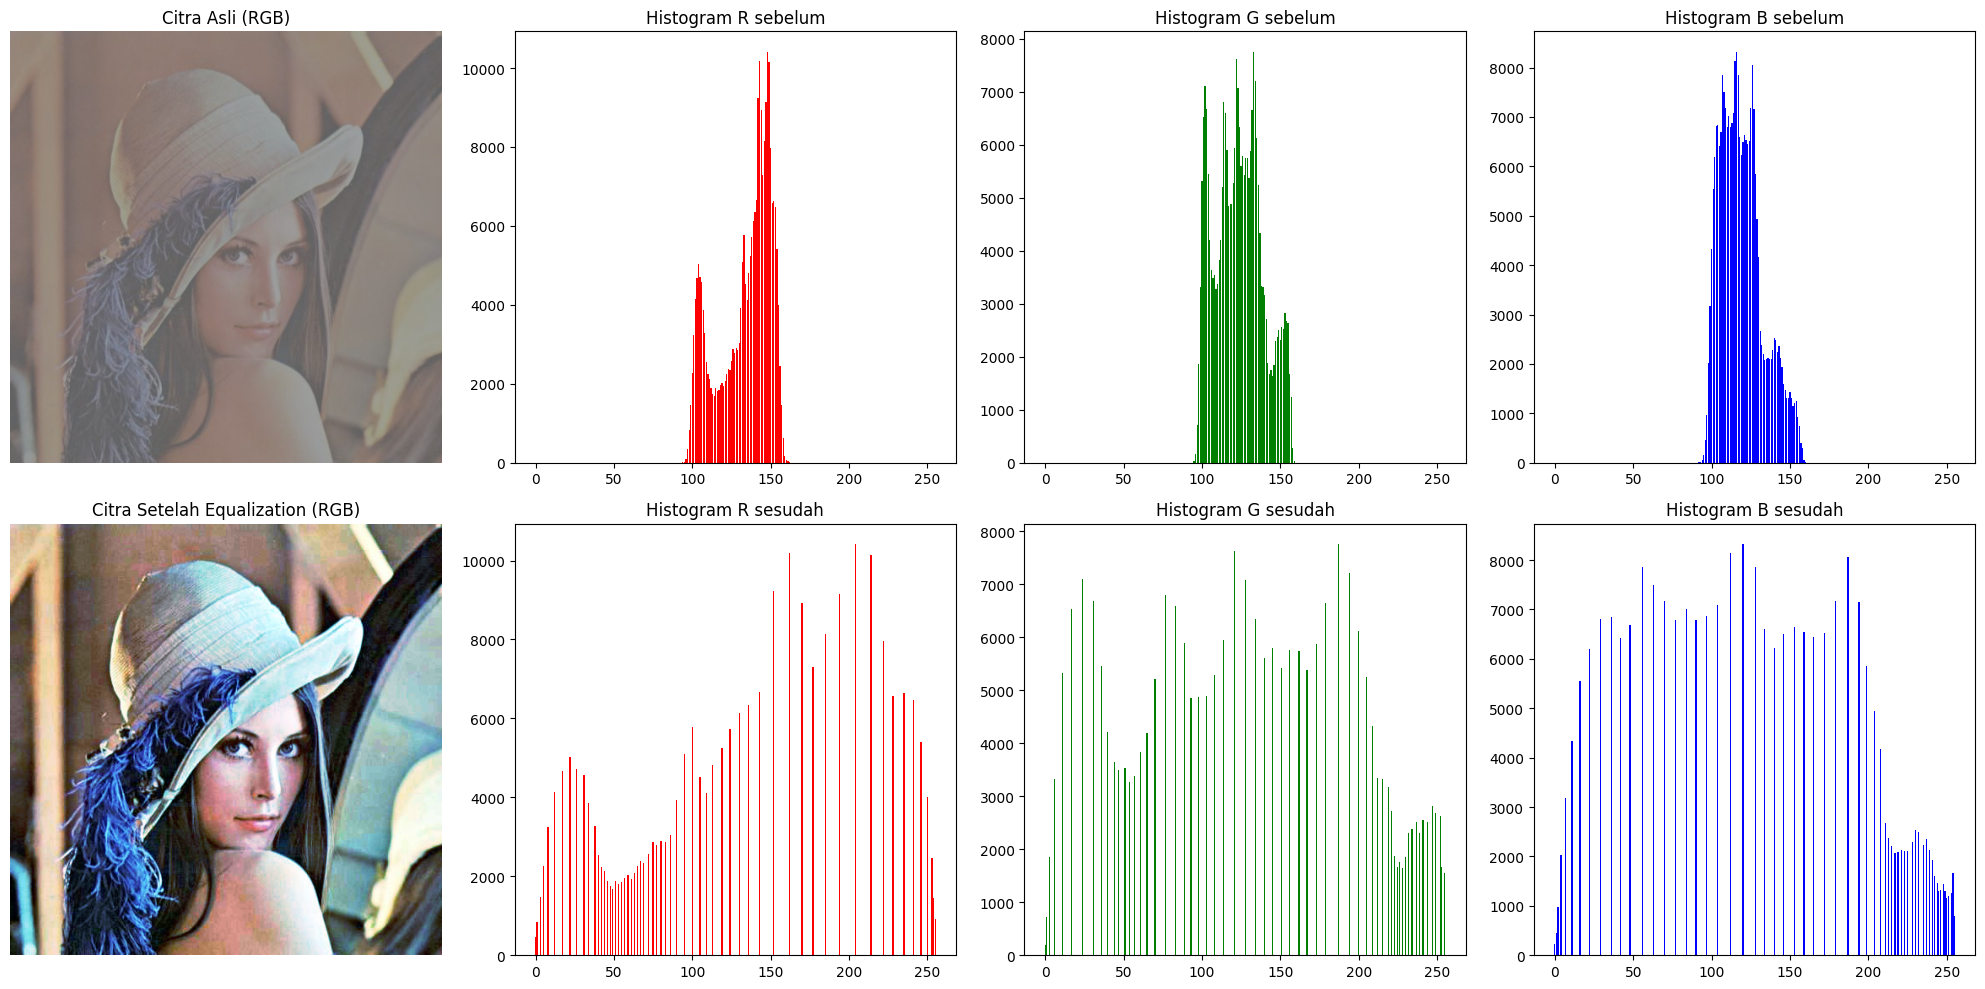

In [ ]:
# Memproses citra dengan menggunakan proses histogram equalization
image = cv.imread('/content/drive/MyDrive/PCVK25_3F_11/Gambar/lena_lc.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Pisahkan channel
r, g, b = cv.split(image)

# Equalization per channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali
equalized = cv.merge((r_eq, g_eq, b_eq))

# Histogram sebelum
hist_r, bins = np.histogram(r, bins=256, range=(0,256))
hist_g, _ = np.histogram(g, bins=256, range=(0,256))
hist_b, _ = np.histogram(b, bins=256, range=(0,256))

# Histogram sesudah
hist_r_eq, _ = np.histogram(r_eq, bins=256, range=(0,256))
hist_g_eq, _ = np.histogram(g_eq, bins=256, range=(0,256))
hist_b_eq, _ = np.histogram(b_eq, bins=256, range=(0,256))

# Plot hasil
fig, axs = plt.subplots(2, 4, figsize=(20,10))

# Gambar asli
axs[0,0].imshow(image)
axs[0,0].set_title("Citra Asli (RGB)")
axs[0,0].axis("off")

# Histogram asli
axs[0,1].bar(bins[:-1], hist_r, color='red')
axs[0,1].set_title("Histogram R sebelum")
axs[0,2].bar(bins[:-1], hist_g, color='green')
axs[0,2].set_title("Histogram G sebelum")
axs[0,3].bar(bins[:-1], hist_b, color='blue')
axs[0,3].set_title("Histogram B sebelum")

# Gambar hasil equalization
axs[1,0].imshow(equalized)
axs[1,0].set_title("Citra Setelah Equalization (RGB)")
axs[1,0].axis("off")

# Histogram hasil equalization
axs[1,1].bar(bins[:-1], hist_r_eq, color='red')
axs[1,1].set_title("Histogram R sesudah")
axs[1,2].bar(bins[:-1], hist_g_eq, color='green')
axs[1,2].set_title("Histogram G sesudah")
axs[1,3].bar(bins[:-1], hist_b_eq, color='blue')
axs[1,3].set_title("Histogram B sesudah")

plt.tight_layout()
plt.show()